#Twitter Sentiment Analysis

#### We scrape data from Twitter to compare the sentiment towards a German politican in the aftermath of two different events. In the first instance media resonance seemed to be quite positive, in the second more of the opposite. 
#### Our plan is too see if we can validate that perception with an analysis of 10000 Tweets which were posted in the days after the respective event.

#### We also try to extraxt significant nouns and compare the frequency in the postive and negative class.



In [ ]:
!pip install germansentiment
!pip install transformers
!pip3 install snscrape


In [ ]:
import snscrape.modules.twitter as sntwitter
from germansentiment import SentimentModel
import pandas as pd
import itertools
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

## First incident
##### Postive condition
##### Sentiment analysis after a gas deal was announced
##### Time period 21.3.22 - 26.3.21

In [ ]:
# max. 10000 Tweets

data = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    "Habeck since:2022-03-21 until:2022-03-26").get_items(),10000))



In [ ]:
# 9985 gefunden

len(data)

9985

In [ ]:
df = data[['date', 'id', 'content']]
df.head()

,date,id,content
0,2022-03-25 23:59:13+00:00,1507507425695485958,"""Wie das Klopapier"": Habeck befürchtet Benzin-..."
1,2022-03-25 23:58:41+00:00,1507507293738483720,"@Koelner_Peter Habeck sagte wohl vor der Wahl,..."
2,2022-03-25 23:57:20+00:00,1507506954427633665,@Volt_Aire_watch @SHomburg @punktpreradovic @T...
3,2022-03-25 23:55:56+00:00,1507506601745334278,@Watch_Greens @tazgezwitscher Aber nichts zu #...
4,2022-03-25 23:54:10+00:00,1507506155639214093,#Habeck #Klimaschutz schließen sich Klimasch...


In [ ]:
# we clean the tweets from unnecessary characters

import regex as re

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    
    return text
df['cleanedTweets'] = df['content'].apply(cleanTweets)
 
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,date,id,content,cleanedTweets
0,2022-03-25 23:59:13+00:00,1507507425695485958,"""Wie das Klopapier"": Habeck befürchtet Benzin-...","""Wie das Klopapier"": Habeck befürchtet Benzin-..."
1,2022-03-25 23:58:41+00:00,1507507293738483720,"@Koelner_Peter Habeck sagte wohl vor der Wahl,...","Habeck sagte wohl vor der Wahl, koste es was ..."
2,2022-03-25 23:57:20+00:00,1507506954427633665,@Volt_Aire_watch @SHomburg @punktpreradovic @T...,Vermutlich erzählt unser grüner Biolatsche...
3,2022-03-25 23:55:56+00:00,1507506601745334278,@Watch_Greens @tazgezwitscher Aber nichts zu #...,Aber nichts zu Atomkraft. Habeck
4,2022-03-25 23:54:10+00:00,1507506155639214093,#Habeck #Klimaschutz schließen sich Klimasch...,Habeck Klimaschutz schließen sich Klimaschut...


In [ ]:
# we use the BERT based GermanSentiment transformer model which is trained on German language 
# we test the three condtitions positve, neutral and negative with straighforwad self imagined sentences
# the accuracy is very high for each case

model = SentimentModel()


texts = ['Herr Habeck macht einen tollen Job','Herr Harbeck geht so', 'Habeck soll abdanken']
sentiment, probability = model.predict_sentiment(texts, output_probabilities = True )
sentiment, probability

(['positive', 'neutral', 'negative'],
 [[['positive', 0.9730018377304077],
   ['negative', 0.02211729995906353],
   ['neutral', 0.0048808627761900425]],
  [['positive', 0.005423673894256353],
   ['negative', 0.03191997483372688],
   ['neutral', 0.9626563787460327]],
  [['positive', 0.01752895675599575],
   ['negative', 0.9819135069847107],
   ['neutral', 0.0005574856768362224]]])

In [ ]:
# we split the 10000 Tweets into two parts to run them throgh the model and concantenate them afterwards

tweets = [ str(i) for i in df.cleanedTweets]

tweets_1 = tweets[:5000]
model = SentimentModel()

sentiment_1, probability_1 = model.predict_sentiment(tweets_1, output_probabilities = True )

tweets_2 = tweets[5000:]

sentiment_2, probability_2 = model.predict_sentiment(tweets_2, output_probabilities = True )

sentiment = sentiment_1 + sentiment_2
probability = probability_1 + probability_2

In [ ]:
df['sentiment'] = sentiment
df['probability'] = probability
df = df[['cleanedTweets','sentiment', 'probability', 'id']]
n = 10
for i in range(n):

  print(df.iloc[i,0],'\n', df.iloc[i,1], '\n', df.iloc[i,2], '\n')

"Wie das Klopapier": Habeck befürchtet Benzin-Hamsterkäufe bei Lieferstopp  Der Bundeswirtschaftsminister sucht nach Alternativen zu russischen Energiequellen. Ein sofortiger Ausstieg hätte aber "dramatische" Folgen. Würde es zu einem schnellen Liefersto…  
 neutral 
 [['positive', 0.00010223661956842989], ['negative', 0.0002674223214853555], ['neutral', 0.999630331993103]] 

 Habeck sagte wohl vor der Wahl, koste es was es wolle. 
 neutral 
 [['positive', 0.0002852398611139506], ['negative', 0.0010396423749625683], ['neutral', 0.9986750483512878]] 

    Vermutlich erzählt unser grüner Biolatschenminister Habeck Märchengeschichten aus 1001-Nacht von Katar, dass die Tanker mit Biostrom aus Biogasanlagen betrieben werden, für die dann hektoliterweise Diesel verbraucht werden, damit der Mais zu Biogas vergoren wird... oder so 🤔 
 neutral 
 [['positive', 0.0005704849027097225], ['negative', 0.0018176023149862885], ['neutral', 0.9976118803024292]] 

  Aber nichts zu Atomkraft. Habeck 
 neut

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
score =[]
temp = 0

for i in list(df.probability):
  for j in i: 
      
   if float(j[1])> temp:      

       temp = float(j[1])
  score.append(temp)
df['score'] = score

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Phyton/Project/Twitter/tweets_habeck_gas.csv')

In [ ]:
df.drop(['probability'], axis = 1)

,cleanedTweets,sentiment,id,score
0,"""Wie das Klopapier"": Habeck befürchtet Benzin-...",neutral,1507507425695485958,0.999630
1,"Habeck sagte wohl vor der Wahl, koste es was ...",neutral,1507507293738483720,0.999630
2,Vermutlich erzählt unser grüner Biolatsche...,neutral,1507506954427633665,0.999630
3,Aber nichts zu Atomkraft. Habeck,neutral,1507506601745334278,0.999630
4,Habeck Klimaschutz schließen sich Klimaschut...,neutral,1507506155639214093,0.999630
...,...,...,...,...
9980,Russia is the largest supplier of gas to Germa...,negative,1505697278493093890,0.999992
9981,"Ja, Habeck ist total schuld an allem, was in ...",negative,1505696852754440202,0.999992
9982,Habeck finanziert jetzt den Terrorismus. Die ...,neutral,1505696355376893962,0.999992
9983,"Habeck eigentlich so ""yani, mach zu, solang Ka...",negative,1505696204818108420,0.999992


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df["score"],
                     y = df["sentiment"],orientation = "h")) 
fig.update_layout(plot_bgcolor = "white")
fig.show()

Text(0.5, 1.0, 'Distribution of polarity')

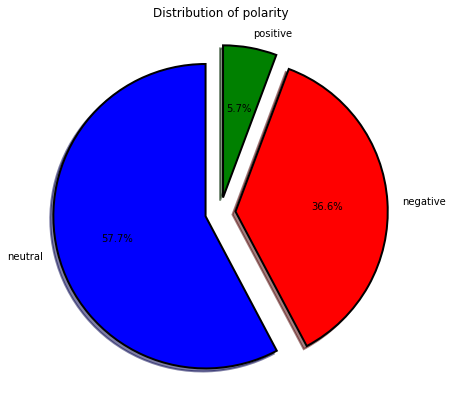

In [ ]:
# we can see that we have 5.7 % positive and 36.6 % negative Tweets

fig = plt.figure(figsize=(7,7))
colors = ('blue', 'red', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags= df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

In [ ]:
# now we split the the sentences into singele words and only keep capitalized words as nouns are capitalized in German
# then we create a datafram for the positive and one for the negative condition


# postivie sentiment

df_pos = df.loc[df['sentiment']=='positive']
sentences = []

for word in df_pos['cleanedTweets']:
    sentences.append(word)
sentences
lines_pos = list()
for line in sentences:
    words = line.split()
    for w in words:
      if w[0].isupper():
        lines_pos.append(w)

# negative sentiment

df_neg = df.loc[df['sentiment']=='negative']
sentences = []

for word in df_neg['cleanedTweets']:
    sentences.append(word)
sentences
lines_neg = list()
for line in sentences:
    words = line.split()
    for w in words:
      if w[0].isupper():
        lines_neg.append(w)


In [ ]:
# capizalized words we don't want in our analyis

blacklist = ['Herr Habeck', 'Habeck','Robert', 'Aber', 'Da', 'Der', 'Sie','Es', 'Wenn', 'Ich','Die', 'Habeck,','Habeck.','Und', 'Herr',
             'Das','Er', 'So', 'Sehr', 'Was', 'HabeckRuecktrittSofort', 'TwitternWieHabeck', 'Wie', 'Wir', 'Sind', 'Alles', 'Ist']

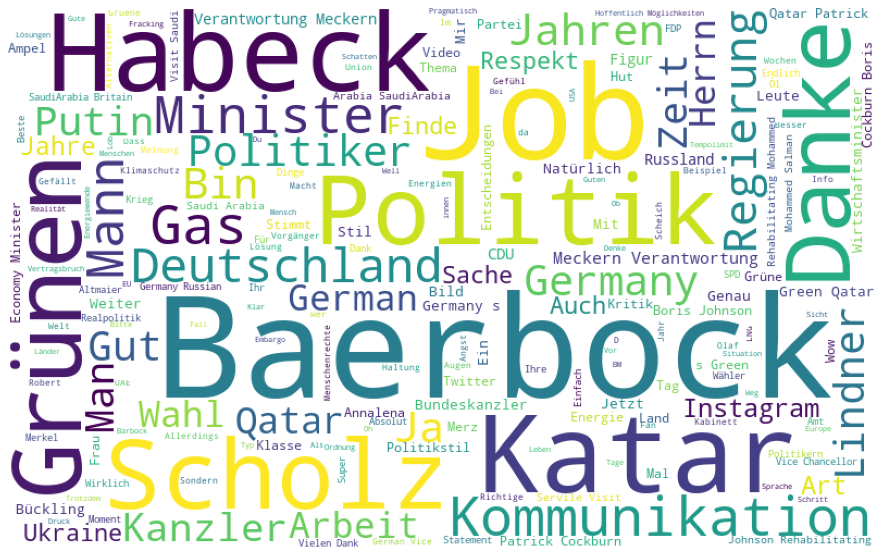

In [ ]:
# we create a function for wordcloud to show most significant nouns



def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
    print('')

# wordcloud for postive sentiment    

lines_pos = [x for x in lines_pos if x not in blacklist]
posTweets = lines_pos
create_wordcloud(posTweets)


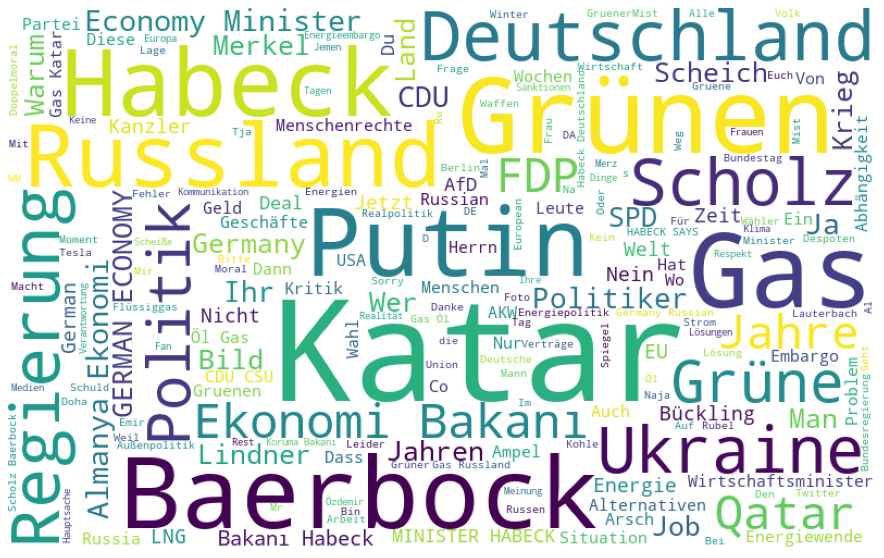

In [ ]:
# wordcloud for negative sentiment

lines_neg = [x for x in lines_neg if x not in blacklist]
negTweets = lines_neg
create_wordcloud(negTweets)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


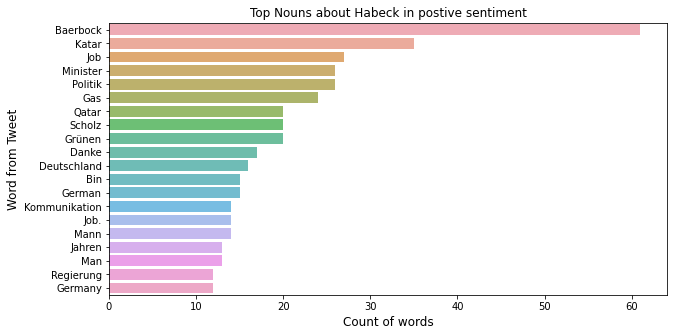

In [ ]:
# most frequent words used in postive contxt

pos_count = pd.DataFrame(posTweets)
pos_nouns = pos_count[0].value_counts()[:20]

plt.figure(figsize=(10,5))
sns.barplot(pos_nouns.values, pos_nouns.index, alpha=0.8)
plt.title('Top Nouns about Habeck in postive sentiment')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


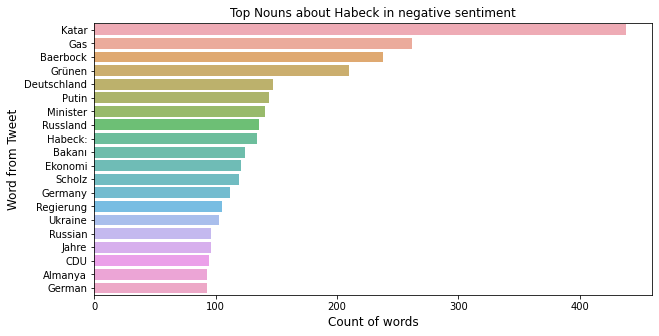

In [ ]:
# most frequent words used in negative contxt

neg_count = pd.DataFrame(negTweets)
neg_nouns = neg_count[0].value_counts()[:20]

plt.figure(figsize=(10,5))
sns.barplot(neg_nouns.values, neg_nouns.index, alpha=0.8)
plt.title('Top Nouns about Habeck in negative sentiment')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()

## Second incident
##### Negative media perception
##### Sentiment analysis after a not ideal talk show appearance
##### Time period 6.9.22 - 7.9.22 


In [ ]:
# max. 10000 Tweets

data = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    "Habeck since:2022-09-06 until:2022-09-09").get_items(), 10000))


In [ ]:
# > 10000 gefunden

len(data)

10000

In [ ]:
df = data[['date', 'id', 'content','username']]
df.tail()

,date,id,content,username
9995,2022-09-08 07:56:34+00:00,1567783940601020418,@JoSteiniger Wer ist der Clown? Marcel Fratzsc...,bluemlingspfad
9996,2022-09-08 07:56:33+00:00,1567783939942629379,"#Scholz hätte #Lauterbach und #Habeck, sowie d...",CK13TheTruth
9997,2022-09-08 07:56:28+00:00,1567783918765576192,@MFratzscher Vielleicht sollte Habeck auch den...,Vaeter_Netzwerk
9998,2022-09-08 07:56:23+00:00,1567783895147347969,"@SHomburg @MFratzscher Passend dazu, von heute...",Karlfotografien
9999,2022-09-08 07:56:19+00:00,1567783878236028928,"Vaddern (76) arbeitet seitdem er 14 ist, war ü...",OstfreeskeDeern


In [ ]:

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)

    return text
df['cleanedTweets'] = df['content'].apply(cleanTweets)
 
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,date,id,content,username,cleanedTweets
0,2022-09-08 23:59:57+00:00,1568026386496983043,Von dieser Frau kann sich die gesamte Reg. Ein...,jurgen_bahr,Von dieser Frau kann sich die gesamte Reg. Ein...
1,2022-09-08 23:57:42+00:00,1568025819544711174,Warum hacken #Habeck bei #maischberger oder #...,Jakob2513,Warum hacken Habeck bei maischberger oder Lem...
2,2022-09-08 23:57:25+00:00,1568025748182827008,Ochlokratie. #Scholz #Habeck #Faeser #Baerbock...,Murphoe,Ochlokratie. Scholz Habeck Faeser Baerbock Lam...
3,2022-09-08 23:56:50+00:00,1568025601457672193,@derspiegel #Habeck \nhttps://t.co/yUbLt6nfHT,JanneTassin,Habeck
4,2022-09-08 23:56:17+00:00,1568025464694013952,"#Lanz An Lemke, Herrmann u Habeck, bin für Luf...",Roger52116269,"Lanz An Lemke, Herrmann u Habeck, bin für Luft..."


In [ ]:
df.to_csv("tweets_2.csv")
df = pd.read_csv('tweets_2.csv')


In [ ]:


tweets = [ str(i) for i in df.cleanedTweets]

tweets_1 = tweets[:5000]
model = SentimentModel()

sentiment_1, probability_1 = model.predict_sentiment(tweets_1, output_probabilities = True )

tweets_2 = tweets[5000:]

sentiment_2, probability_2 = model.predict_sentiment(tweets_2, output_probabilities = True )

sentiment = sentiment_1 + sentiment_2
probability = probability_1 + probability_2



In [ ]:
df.tail()

In [ ]:
df['sentiment'] = sentiment
df['probability'] = probability
df = df[['cleanedTweets','sentiment', 'probability', 'username']]
n = 10
for i in range(n):
  print(df.iloc[i,0],'\n', df.iloc[i,1], '\n', df.iloc[i,2], '\n')

Von dieser Frau kann sich die gesamte Reg. Eine Scheibe abschneiden. Wer so lückenlos reden kann und nicht wie ein Habeck rumstottert ist eine gute Rednerin.   
 neutral 
 [['positive', 0.0023721670731902122], ['negative', 0.006761401426047087], ['neutral', 0.9908663630485535]] 

Warum hacken Habeck  bei maischberger oder Lemke  jetzt bei Lanz eigentlich so auf der juristischen Definition der Insolvenz herum? Es war doch klar, dass Frau Maischberger gerade auf die Betriebseinstellungen und "pleiten" hinaus wollte. Der Normalbürger kennt den 
 neutral 
 [['positive', 0.00038137269439175725], ['negative', 0.0013010695111006498], ['neutral', 0.9983174800872803]] 

Ochlokratie. Scholz Habeck Faeser Baerbock Lambrecht  
 neutral 
 [['positive', 0.07490497082471848], ['negative', 0.22631733119487762], ['neutral', 0.6987776756286621]] 

 Habeck   
 negative 
 [['positive', 0.0338483564555645], ['negative', 0.9652316570281982], ['neutral', 0.000920044956728816]] 

Lanz An Lemke, Herrmann u Hab

In [ ]:
score =[]
temp = 0
for i in list(df.probability):
  for j in i: 
      
   if float(j[1])> temp:      
       temp = float(j[1])
  score.append(temp)
df['score'] = score

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Phyton/Project/Twitter/tweets_habeck_maischberger.csv')

In [ ]:

fig = go.Figure()
fig.add_trace(go.Bar(x = df["score"],
                     y = df["sentiment"],orientation = "h")) 
fig.update_layout(plot_bgcolor = "white")
fig.show()

Text(0.5, 1.0, 'Distribution of polarity')

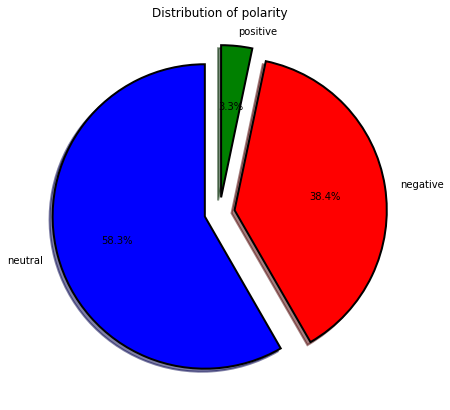

In [ ]:
# here we only see 3.3% positive Tweets but 38.4% negaative

fig = plt.figure(figsize=(7,7))
colors = ('blue', 'red', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags= df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

In [ ]:
## postivie sentiment

df_pos = df.loc[df['sentiment']=='positive']
sentences = []

for word in df_pos['cleanedTweets']:
    sentences.append(word)

sentences
lines_pos = list()
for line in sentences:
    words = line.split()
    for w in words:
      if w[0].isupper():
        lines_pos.append(w)

# negative sentiment

df_neg = df.loc[df['sentiment']=='negative']
sentences = []

for word in df_neg['cleanedTweets']:
    sentences.append(word)
sentences
lines_neg = list()
for line in sentences:
    words = line.split()
    for w in words:
      if w[0].isupper():
        lines_neg.append(w)


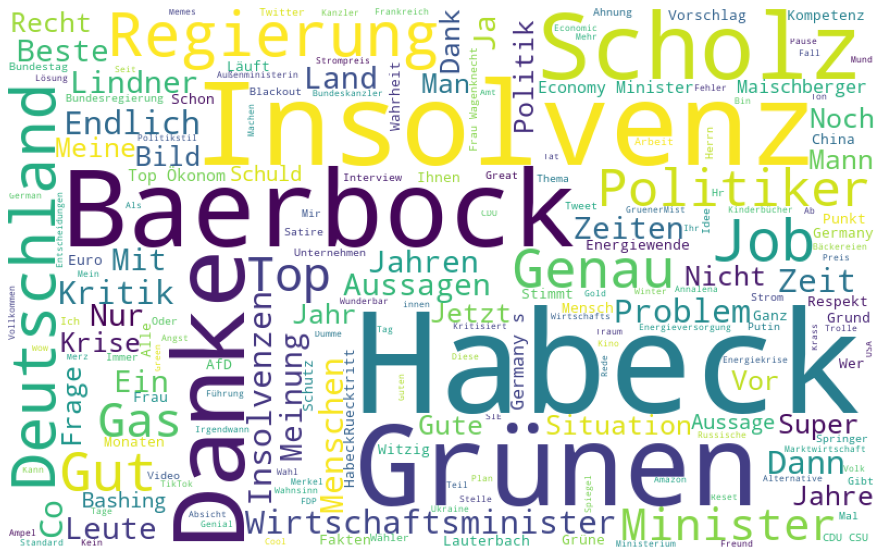

In [ ]:
#create a function for wordcloud

def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
    print('')

    
# positive Tweets
lines_pos = [x for x in lines_pos if x not in blacklist]
posTweets = lines_pos
create_wordcloud(posTweets)


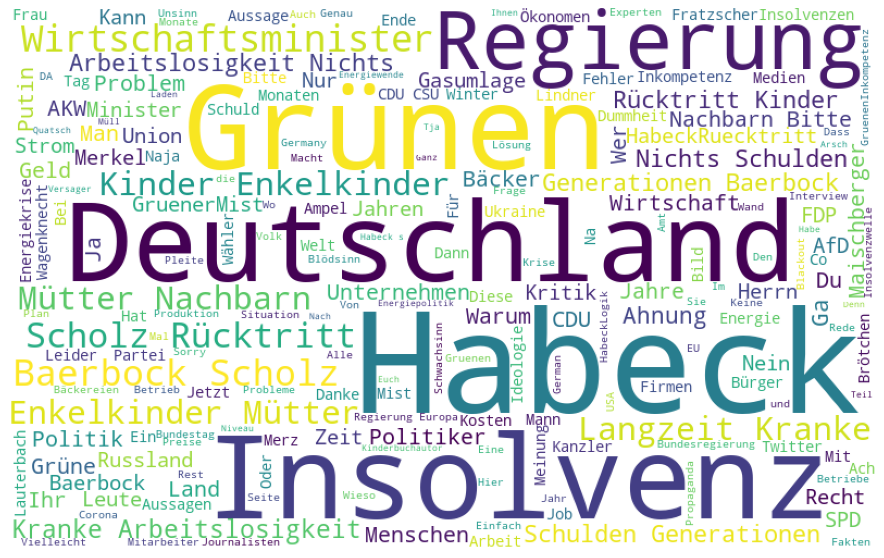

In [ ]:
# negative Tweets
lines_neg = [x for x in lines_neg if x not in blacklist]
negTweets = lines_neg
create_wordcloud(negTweets)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



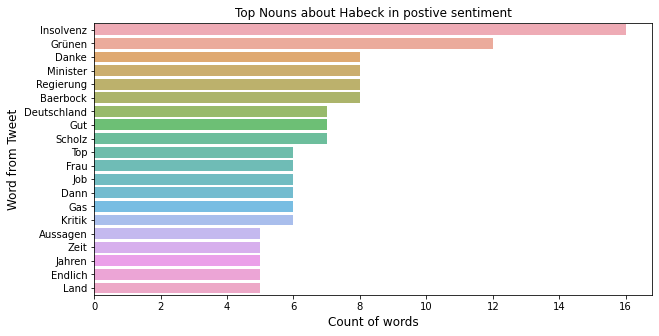

In [ ]:
# postivie sentiment
pos_count = pd.DataFrame(posTweets)
pos_nouns = pos_count[0].value_counts()[:20]

plt.figure(figsize=(10,5))
sns.barplot(pos_nouns.values, pos_nouns.index, alpha=0.8)
plt.title('Top Nouns about Habeck in postive sentiment')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



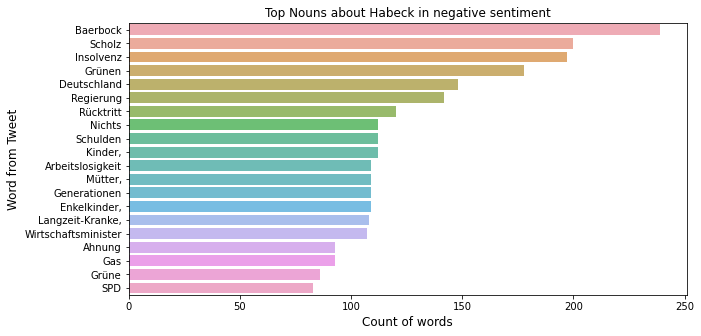

In [ ]:
# negative Sentiment
neg_count = pd.DataFrame(negTweets)
neg_nouns = neg_count[0].value_counts()[:20]

plt.figure(figsize=(10,5))
sns.barplot(neg_nouns.values, neg_nouns.index, alpha=0.8)
plt.title('Top Nouns about Habeck in negative sentiment')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()



### Conclusion
Taking under consideration that politicians receive in general far more negative than postive social media feedback, it could be said that our analysis confirms our assumption about the difference in media perception. In the negative condition there were 43% less tweets with a postive sentiment and 5% more negatice tweets.
It is also interesting to look at the difference in noun usage between the postive and negative cases. 